<a href="https://colab.research.google.com/github/Koncz16/IntelligensModszerekTantargy/blob/main/Elofeldolgozas_es_vizualizacio_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline ### most nem kell, de maskor jol johet :-)

**Adatok betöltése**

In [ ]:
data_main = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data_with_errors.txt', header=0, sep='\t')
data = data_main.copy()

In [ ]:
data

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


**DataFrame oszlopai**

In [ ]:
data['starttemp']  # egy oszlopra jol olvashatoan hivatkozhatunk az oszlop nevevel

,starttemp
0,17.0
1,19.0
2,30.0
3,29.0
4,30.0
...,...
98,21.0
99,16.0
100,17.0
101,15.0


In [ ]:
list(data) # oszlopnevek listaja

['date',
 'starttime',
 'endtime',
 'starttemp',
 'endtemp',
 'air conditioner',
 'trafic',
 'route',
 'dist',
 'avg.cons.',
 'speed',
 'duration',
 'fuel type',
 'road',
 'num. persons']

**Hiányzó értékek (missing values)**

In [ ]:
data['starttemp'].isnull()
# egy DataFrame típusú True-False vektort ad.
# Az ertek attol fuggoen True vagy False, hogy
# az adott peldany eeseteben a cella erteke null-e
# (azaz hianyzo ertek-e)

,starttemp
0,False
1,False
2,False
3,False
4,False
...,...
98,False
99,False
100,False
101,False


In [ ]:
data['starttemp'].isnull().sum()
# összeadasnal: True=1, False=1
# Igy tehat a hianyzo ertekek szamat kapjuk

5

*1. feladat*

Írjon egy for ciklust, amely kiszámolja és kiírja a hiányzó értékek számát minden egyes attribútumra (oszlopra). A hiányzó értékek számával együtt az oszlop nevét is írja ki.

In [ ]:
# ...IDE JÖN A KÓD...
for column in list(data):
    print(column + ": " + str(data[column].isnull().sum()))



date: 0
starttime: 0
endtime: 0
starttemp: 5
endtemp: 4
air conditioner: 0
trafic: 0
route: 0
dist: 1
avg.cons.: 0
speed: 0
duration: 0
fuel type: 0
road: 0
num. persons: 0


*2. feladat*

Készítsen másolatot az adatról, és a másolatban helyettesítse a *starttemp* oszlop hiányzó értékeit

(a) a starttemp átlagos értékével,

(b) a starttemp mediánjával.

(c) Írjon egy for ciklust, amely az összes oszlop esetén helyettesíti a hiányzó értékeket az adott oszlop átlagával, ahol ez lehetséges!

In [ ]:
# ...IDE JÖN A KÓD...

data_a = data.copy()

avg = data_a['starttemp'].mean()

print(avg)

data_a['starttemp'].fillna(avg, inplace=True)

print("Hiányzó értékek szama: "+ str(data_a['starttemp'].isnull().sum()))


22.744897959183675
Hiányzó értékek szama: 0


In [ ]:
# ...IDE JÖN A KÓD...

data_b = data.copy()

avg = data_b['starttemp'].median()

print(avg)

data_b['starttemp'].fillna(avg, inplace=True)

print("Hiányzó értékek szama: "+ str(data_b['starttemp'].isnull().sum()))


22.0
Hiányzó értékek szama: 0


In [ ]:
# ...IDE JÖN A KÓD...

data_c = data.copy()

for column in list(data):
    if data_c[column].dtype in ["float64", "int64"]:
        avg = data_c[column].mean()
        data_c[column].fillna(avg, inplace=True)

print("Hiányzó értékek száma oszloponként:")
print(data_c.isnull().sum())


Hiányzó értékek száma oszloponként:
date               0
starttime          0
endtime            0
starttemp          0
endtemp            0
air conditioner    0
trafic             0
route              0
dist               0
avg.cons.          0
speed              0
duration           0
fuel type          0
road               0
num. persons       0
dtype: int64


A következőkben egy diagramon fogjuk ábrázolni az egyes utazások esetében az induláskori és érkezéskori hőmérsékletet. Csak azokat az utazásokat fogjuk használni, ahol az eredeti adatban mind a két hőmérsékleti érték adott. Először a scatterplottal ismerkedünk.

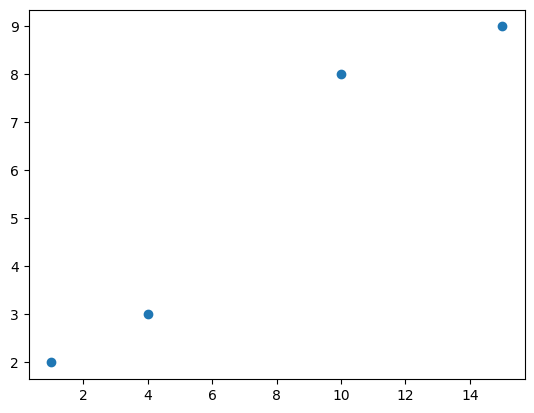

In [ ]:
# 1 2
# 4 3
# 10 8
# 15 9
x = [1, 4, 10, 15]
y = [2, 3, 8, 9]
plt.scatter(x,y);

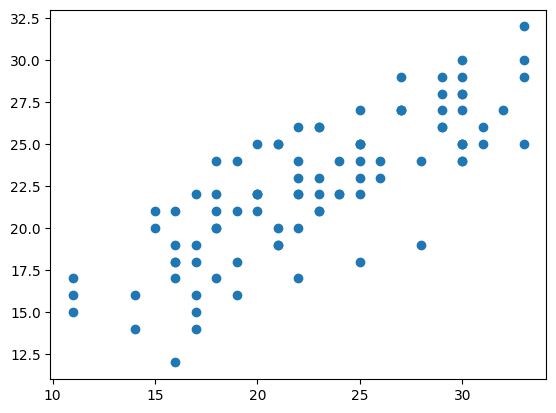

In [ ]:
both_values_present = np.logical_and(data['starttemp'].isnull()==False,
                                     data['endtemp'].isnull()==False)
both_values_valid = np.logical_and(both_values_present, data['endtemp'] < 100)
plt.scatter( data[both_values_valid]['starttemp'],
            data[both_values_valid]['endtemp'] )
plt.show()

*3. feladat*

Az érkezéskori hőmérséklet jobb becslés lehet az indulási hőmérsékletre, mint az összes induláskori hőmérséklet átlaga, és fordítva: amikor az érkezéskori hőmérséklet hiányzik, az induláskori hőmérséklet lehet egy jó becslés.

(a) Írjon egy olyan kódot, amely ellenőrzi, hogy van-e olyan eset, amikor egyszerre hiányzik az induláskori és érkezéskori hőmérséklet!

(b) Amikor az **indulási** hőmérséklet hiányzik, helyettesítse azt az érkezéskori hőmérséklettel!

(c) Amikor csak az **érkezéskori** hőmérséklet hiányzik, helyettesítse azt az induláskori hőmérséklettel!


In [ ]:
data = data_main.copy()

In [ ]:
# ...IDE JÖN A KÓD...
both_missing = data['starttemp'].isnull() & data['endtemp'].isnull()

print("Mindketto hianyzik:", both_missing.sum())


Mindketto hianyzik: 0


In [ ]:
# ...IDE JÖN A KÓD...

data['starttemp'].fillna(data['endtemp'], inplace=True)

print("Hianyzik az indulo:", data['starttemp'].isnull().sum())


Hianyzik az indulo: 0


In [ ]:
# ...IDE JÖN A KÓD...
data['endtemp'].fillna(data['starttemp'], inplace=True)

print("Hianyzik az erkezo:", data['endtemp'].isnull().sum())


Hianyzik az erkezo: 0


*4. feladat*

Lehetséges, hogy az indulási és érkezéskori hőmérséklet különbsége összefügg azzal, hogy mikor kerül sor az utazásra (reggel nagyobb az érkezéskori hőmérséklet, este pedig kisebb). A következőkben ezt fogjuk megvizsgálni.

(a) Vezessen be egy új oszlopot, ami a két hőmérséklet különbségét tartalmazza.

In [ ]:
# ...IDE JÖN A KÓD...

data['temp_diff'] = data['starttemp'] - data['endtemp']

print(data[['starttemp', 'endtemp', 'temp_diff']].head(10))


   starttemp  endtemp  temp_diff
0       17.0     15.0        2.0
1       19.0     24.0       -5.0
2       30.0     28.0        2.0
3       29.0     28.0        1.0
4       30.0     25.0        5.0
5       25.0     25.0        0.0
6       25.0     25.0        0.0
7       25.0     25.0        0.0
8       18.0     24.0       -6.0
9       31.0     26.0        5.0


(b) Vezessen be egy új oszlopot, ami azt tartalmazza számként, hogy a nap melyik órájában kerül sor az utazásra! Ezt az információt a *starttime* oszlopban található string első két karakteréből "hámozza ki".

In [ ]:
# ...IDE JÖN A KÓD...

data['trip_hour'] = data['starttime'].str[:2].astype(int)

print(data[['starttime', 'trip_hour']].head(10))


  starttime  trip_hour
0     00:03          0
1     08:20          8
2     13:00         13
3     15:30         15
4     18:18         18
5     21:04         21
6     21:04         21
7     21:04         21
8     10:48         10
9     15:22         15


A következőkben csoportosítjuk az egyes utazásokat aszerint, hogy a nap melyik órájában kerül sor az utazásra, majd csoportonként kiszámoljuk az előbbiekben bevezetett *temp_diff* mediánját, amelyet az óra függvényében ábrázolunk.

In [ ]:
# ...IDE JÖN A KÓD...

temp_diff_by_hour = data.groupby('trip_hour')['temp_diff'].median()


for hour, median in temp_diff_by_hour.items():
    print(f"{hour:<4} {median}")

0    2.0
1    1.0
5    -3.0
6    -3.0
7    -2.0
8    -2.0
9    -2.0
10   0.0
11   -2.0
12   1.5
13   1.0
14   -1.5
15   1.0
16   3.0
17   2.0
18   1.0
19   5.0
20   2.0
21   0.0
22   2.0
23   2.5


*5. feladat*

(a) Helyettesítse a **starttemp** hiányzó értékeit az **endtemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)!

In [ ]:
data = data_main.copy()

In [ ]:
# ...IDE JÖN A KÓD...

data['temp_diff'] = data['endtemp'] - data['starttemp']

temp_diff_median = data['temp_diff'].median()

data['starttemp'].fillna(data['endtemp'] - temp_diff_median, inplace=True)

print(f"Hianyzik az starttemp: {data['starttemp'].isnull().sum()}")


Hianyzik az starttemp: 0


(b) Helyettesítse az **endtemp** hiányzó értékeit a **starttemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)! Miben különbözik a megoldás az előbbi részfeladat megoldásától?

In [ ]:
# ...IDE JÖN A KÓD...
data['endtemp'].fillna(data['starttemp'] + temp_diff_median, inplace=True)

print(f"Hianyzik az endtemp: {data['endtemp'].isnull().sum()}")


Hianyzik az endtemp: 0


*6. feladat*

Diszkusszió: hogyan töltené ki a távolság hiányzó értékét?

In [ ]:
# ...IDE JÖN A KÓD...

**Duplikátumok keresése**

In [ ]:
data = data_main.copy()

*7. feladat*

Az úgynevezett **egzakt duplikátumok** (amikor pontosan ugyanaz a példány/rekord ismétlődik) eliminálása tipikusan két lépésben történik: az első lépésben az adatokat rendezzük, ezáltal a duplikátumok egymást követően helyezkednek el az adattáblában. A második lépésben az egymást követő példányokról döntjük el, hogy azonosak-e.
Az esetünkben az adattábla eredetileg is rendezett.

(a) Írjon egy olyan függvényt, amely az adattábla *i*-dik példányáról (*i* a függvény argumentuma) eldönti, hogy azonos-e az *(i+1)*-dik példánnyal.

In [ ]:
# ...IDE JÖN A KÓD...
def is_duplicate(data, i):
    return data.iloc[i].equals(data.iloc[i + 1])


(b) Az előbbi függvény felhasználásával írjon egy olyan szkriptet, amely az adattábla minden egyes példányáról eldönti, hogy megtartantó-e, azaz különbözik-e a következő példánytól. Eredményként egy True/False értékekből álló listát várunk, amelyben True azt jelöli, hogy a példányt megtartjuk, False pedig azt, hogy eldobjuk, mert egy másik példány azonos vele.

In [ ]:
# ...IDE JÖN A KÓD...

keep = []
for i in range(len(data)- 1):
  if is_duplicate(data, i):
    keep.append(False)
  else:
    keep.append(True)
keep.append(True)

# keep


A deduplikált adattábla:

In [ ]:
data_dedup = pd.DataFrame(data[keep])
data_dedup



,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


**Inkonzisztens értékek**

*8. feladat*

(a) Vizsgálja meg, hogy az adattábla *air conditioner* oszlopa milyen értékeket vesz fel, melyiket hányszor. Segítség: használjon *groupby*-t és *count*-ot!

In [ ]:
# ...IDE JÖN A KÓD...

air_conditioner_counts = data.groupby('air conditioner').count()


air_conditioner_counts = air_conditioner_counts['starttemp']  # Bármi más oszlopot is választhatunk

print(air_conditioner_counts)



air conditioner
off     53
offf     1
on      42
onn      1
oof      1
Name: starttemp, dtype: int64


(b) Helyettesítse az "offf" értékeket "off"-fal!



In [ ]:
# ...IDE JÖN A KÓD...
print(data['air conditioner'].unique())

data['air conditioner'] = data['air conditioner'].replace('offf', 'off')

print(data['air conditioner'].unique())


['off' 'on' 'oof' 'offf' 'onn']
['off' 'on' 'oof' 'onn']


(c) Helyettesítse az "onn" értékeket "on"-nal!

In [ ]:
# ...IDE JÖN A KÓD...
print(data['air conditioner'].unique())

data['air conditioner'] = data['air conditioner'].replace('onn', 'on')

print(data['air conditioner'].unique())

['off' 'on' 'oof' 'onn']
['off' 'on' 'oof']


(d) Helyettesítse az "oof" értékeket "off"-fal!

In [ ]:
# ...IDE JÖN A KÓD...
print(data['air conditioner'].unique())

data['air conditioner'] = data['air conditioner'].replace('oof', 'off')

print(data['air conditioner'].unique())

['off' 'on' 'oof']
['off' 'on']


**Leíró statisztikák**

Betöltjük a helyes adatokat:

In [ ]:
data = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data.txt', header=0, sep='\t')

In [ ]:
data = data_main.copy()

*9. feladat*

Számolja ki a kezdeti hőmérséklet

(a) minimumát és maximumát,

(b) 25%-os és 75%-os percentiliseit,

(c) és szórását!

(d) Írjon egy függvényt, amellyel bármelyik oszlop amplitúdója (maximumának és
    minimumának különbsége) meghatározható!

(e) Írjon egy függvényt, amely meghatározza az alsó és felső kvartilisek távolságát!

(Segítség: használja a numpy függvényeit!)

In [ ]:
# ...IDE JÖN A KÓD... a
min_temp = data['starttemp'].min()
max_temp = data['starttemp'].max()

print("Min:", min_temp)
print("Max:", max_temp)



Min: 11
Max: 33


In [ ]:
# ...IDE JÖN A KÓD... b

percentile_25 = np.percentile(data['starttemp'], 25)
percentile_75 = np.percentile(data['starttemp'], 75)

print("25%:", percentile_25)
print("75%:", percentile_75)



25%: 18.0
75%: 28.0


In [ ]:
# ...IDE JÖN A KÓD... c
std_dev = data['starttemp'].std()
std_dev = data['starttemp'].std()

print("Szoras:", std_dev)



Szoras: 5.688904671695277


In [ ]:
# ...IDE JÖN A KÓD... d

def calculate_amplitude(column):
    return column.max() - column.min()

amplitude = calculate_amplitude(data['starttemp'])

print("Ampl:", amplitude)


Ampl: 22


In [ ]:
# ...IDE JÖN A KÓD... e

def calculate_quartile_difference(column):
    return percentile_75 - percentile_25


diference = calculate_quartile_difference(data['starttemp'])

print("Also es felso kvartilis tavolsaga:", diference)


Also es felso kvartilis tavolsaga: 10.0


In [ ]:
# ...IDE JÖN A KÓD...

**Diagramok**

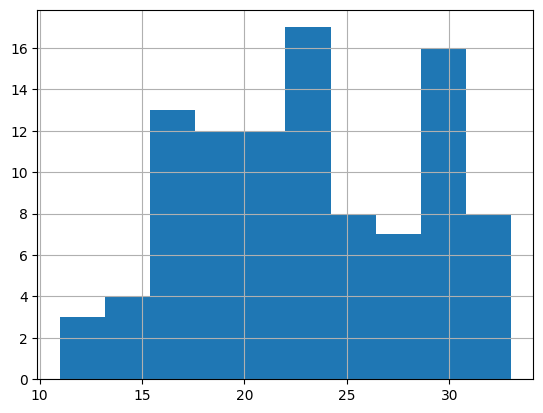

In [ ]:
data["starttemp"].hist();

*10. feladat*

A "pandas DataFrame" dokumentációját és/vagy interneten elérhető forrásokat felhasználva módosítsa az előbbi kódot úgy, hogy a hisztogram oszlopainak száma ne 10, hanem 20 legyen!

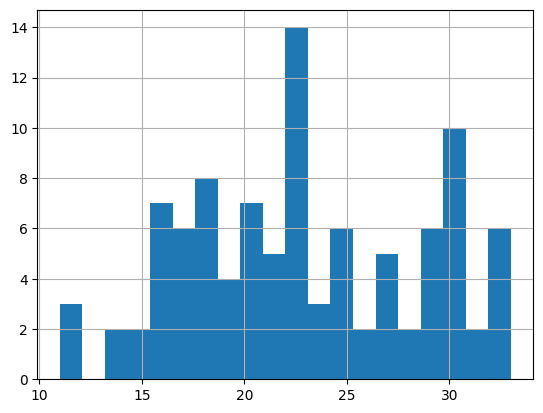

In [ ]:
# ...IDE JÖN A KÓD...
data["starttemp"].hist(bins=20,);

*11. feladat*

Határozza meg, hány esetben volt a légkondi

(a) bekapcsolva (ac_on), illetve

(b) kikapcsolva (ac_off).

In [ ]:
# ...IDE JÖN A KÓD...

print(data['air conditioner'].unique())

ac_on_count = air_conditioner_counts.at['on']


print("AC on" ,str(ac_on_count))

['off' 'on']
AC on 42


In [ ]:
# ...IDE JÖN A KÓD...

print(data['air conditioner'].unique())

ac_off_count = air_conditioner_counts.at['off']


print("AC off" ,str(ac_off_count))

['off' 'on']
AC off 53


A következőkben a légkondi ki- és bekapcsoltságát fogjuk különböző diagramokon ábrázolni.

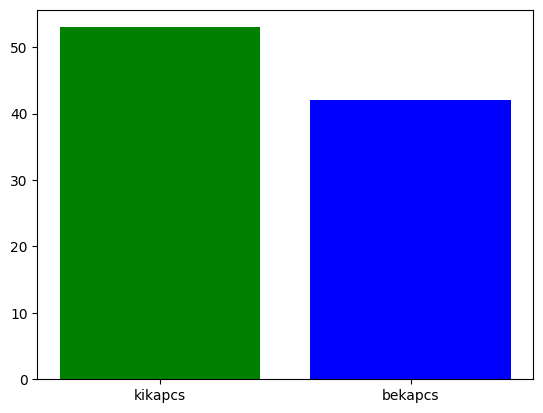

In [ ]:
plt.bar([2,1], [ac_on_count, ac_off_count], tick_label=["bekapcs","kikapcs"], color=["b","g"]);

# plt.show() # most nem kell, de máskor jól jöhet :-)

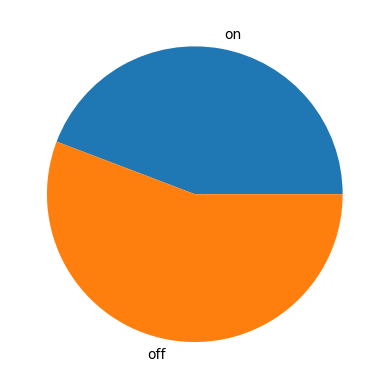

In [ ]:
plt.pie( [ac_on_count, ac_off_count], labels=["on", "off"]);

Kezdőhőmérséklet eloszlása boxplot-on:

- középső vonal: median
- doboz teteje: felso kvartilis (75%-os percentilis)
- doboz alja: also kvartilis (25%-os percentilis)
- felső vonal: median + 1.5*(interquartile range), de legfeljebb a legnagyobb érték
- alsó vonal: median - 1.5*(interquartile range), de nem kisebb a legkisebb értéknél
- outlierek: karikák az alsó és felső vonal alatt ill. felett
- alsó és felső vonalnál az 1.5-ös szorzó állítható, ld. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html



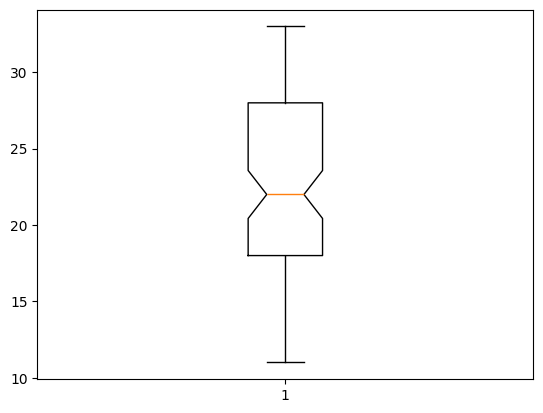

In [ ]:
plt.boxplot(data['starttemp'], notch=True);

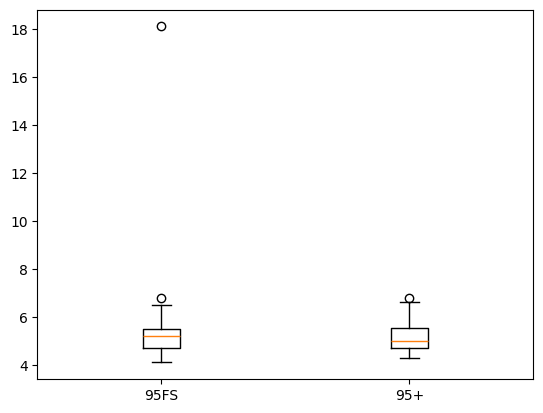

In [ ]:
plt.boxplot([ data[data['fuel type'] =='95FS']['avg.cons.'],
              data[data['fuel type'] =='95+']['avg.cons.'] ],
              labels = ['95FS', '95+']);

**Szélsőséges értékek kezelése**

Egy egyszerű eljárás a szélsőséges értékek kezelésére: kihagyjuk őket. Felrajzoljuk példaként az előbbi boxplot-okat a 10l/100km-es fogyasztásnál nagyobb fogyasztásokat kihagyva.

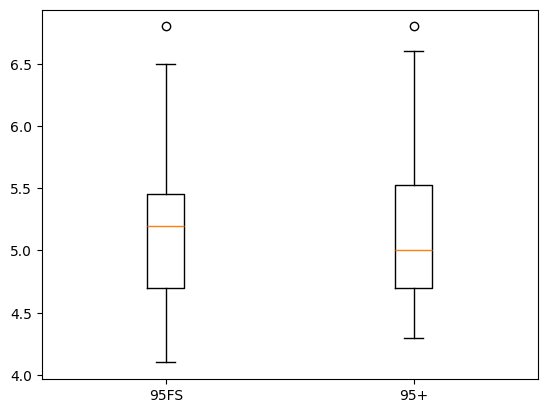

In [ ]:
plt.boxplot([ data[(data['fuel type'] =='95FS') & (data['avg.cons.']<10)]['avg.cons.'],
              data[(data['fuel type'] =='95+')  & (data['avg.cons.']<10)]['avg.cons.'] ],
             labels = ['95FS', '95+']);

**Korreláció**

In [ ]:
np.corrcoef(data['starttemp'], data['endtemp'])

array([[1.        , 0.81328617],
       [0.81328617, 1.        ]])

*12. feladat*

Írja meg azt a kódot, amely megadja kiszámolja a korrelációmátrixot a sebesség és az üzemanyagfogyasztás között!

In [ ]:
# ...IDE JÖN A KÓD...
np.corrcoef(data['speed'], data['avg.cons.'])

array([[ 1.        , -0.42431058],
       [-0.42431058,  1.        ]])

**Scatterplottól a többdimenziós ábrákig**

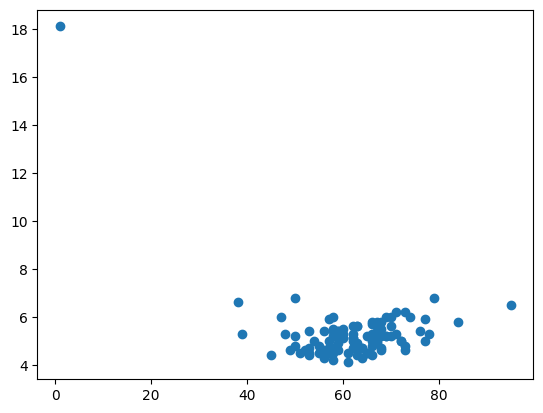

In [ ]:
plt.scatter(data['speed'], data['avg.cons.']);

A következő ábrán színekkel jelöljük a forgalmi viszonyokat, de csak azokat az eseteket ábrázoljuk, ahol a fogyasztás 10l/100km alatti

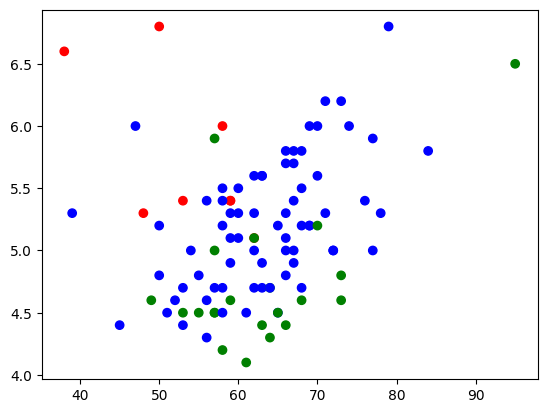

In [ ]:
relevant_data = data[data['avg.cons.']<10]

colors = []
for tr in relevant_data['trafic']:
    if tr == 'low':
        colors.append('g')
    elif tr == 'normal':
        colors.append('b')
    else:
        colors.append('r')

plt.scatter(relevant_data['speed'],
            relevant_data['avg.cons.'],
            c = colors);

*13. feladat*

Hozzon létre egy új attribútumot (oszlopot), amely az átlagos hőmérsékletet (indulási és érkezéskori hőmérsékletek átlagát) tartalmazza!

In [ ]:
 # ...IDE JÖN A KÓD...
data['temp'] =data[['starttemp', 'endtemp']].mean(axis=1)
data['temp'].head(10)

,temp
0,16.0
1,21.5
2,29.0
3,28.5
4,27.5
5,25.0
6,21.0
7,28.5
8,23.0
9,27.0


A következőkben egy 3D ábrán egyszerre fogjuk ábrázolni a sebességet, fogyasztást és a hőmérsékletet.

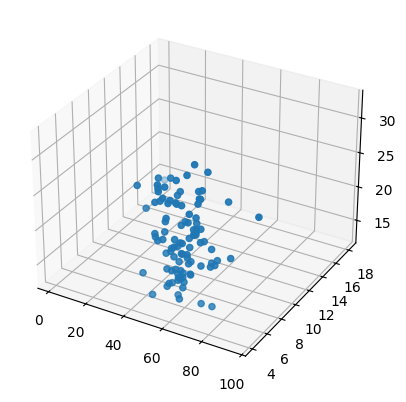

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'])
plt.show()



...szín segítségével megjelenítjük az üzemanyag típusát:



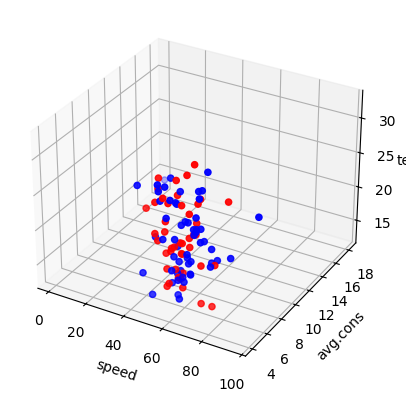

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else:
        colors.append('b')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'], c = colors)
ax.set_xlabel('speed')
ax.set_ylabel('avg.cons')
ax.set_zlabel('temp')
plt.show()

...a jelölő (marker) típusával pedig a forgalmi viszonyokat:

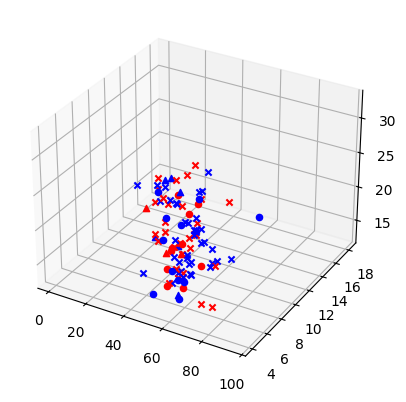

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
m=[]
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else:
        colors.append('b')

for j in range(len(data)):
    if data['trafic'][j] =='low':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = 'o')
    elif data['trafic'][j] =='normal':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = 'x')
    else:
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = '^')
plt.show()

**Összefoglalás**

Tipikus előfeldolgozási (adattiszttítási) lépések:
- Hiányzó értékek kezelése
- Duplikátumok eliminálása
- Inkonzisztens (hibás) értékek javítása
- Adatok kiválasztása: a későbbi elemzés szempontjából lényeges sorok=példányok=rekordok kiválasztása, valamint oszlopok=attribútumok=leírók=feature-k kiválasztása, új attribútumok létrehozása (pl. 'temp'), dimenzionalitás csökkentése (pl. PCA-val, nem volt róla szó).  
- Normalizálás (nem volt róla szó)
- Szélsőséges értékek keresése

Az előfeldolgozás közben (vagy akár előtte ill. utána is) hasznos az adatainkat ábrázolni, különféle leíró statisztikákat számolni, hogy minél jobban megértsük az adatokat.

Az előfeldolgozási lépések projektről-projektre változhatnak, mindig azt használjuk, ami az adott esetben ésszerű! Nem volt szó domain-specifikus előfeldolgozáról (pl. képek esetén azonos felbontásra alakításról).